In [1]:
import pandas as pd

# Read CSV file, skipping first 5 rows, using row 6 as header, and handling comma as thousands separator
df_pop = pd.read_csv(
    'L1_data/UK_census_population.csv',
    skiprows=5,        # Skip first 5 rows. Wnhy?
    thousands=',',     # Interpret commas as thousands separators
    header=0           # After skipping, the first row becomes the header
)

print(df_pop.head())


FileNotFoundError: File b'L1_data/UK_census_population.csv' does not exist

In [3]:
import pandas as pd

# Read CSV file, skipping first 5 rows, using row 6 as header, and handling comma as thousands separator
df_pop = pd.read_csv(
    'mapdatadownload.csv',
    skiprows=5,        # Skip first 5 rows. Wnhy?
    thousands=',',     # Interpret commas as thousands separators
    header=0           # After skipping, the first row becomes the header
)

print(df_pop.head())

   Area code          Area name Area type  Population 2011  Population 2021  \
0  K04000001  England and Wales  National       56075912.0       59597542.0   
1  E92000001            England   Country       53012456.0       56490048.0   
2  W92000004              Wales   Country        3063456.0        3107494.0   
3  E12000001         North East    Region        2596886.0        2647013.0   
4  E12000002         North West    Region        7052177.0        7417397.0   

   Percentage change  
0                6.3  
1                6.6  
2                1.4  
3                1.9  
4                5.2  


In [4]:
list(df_pop.columns)

['Area code',
 'Area name',
 'Area type',
 'Population 2011',
 'Population 2021',
 'Percentage change']

In [5]:
df_pop.columns = df_pop.columns.str.replace(r'\s+', '_', regex=True)
print(list(df_pop.columns)) # check again

['Area_code', 'Area_name', 'Area_type', 'Population_2011', 'Population_2021', 'Percentage_change']


In [6]:
rows, cols = df_pop.shape
print(f"Rows: {rows}, Columns: {cols}")

Rows: 369, Columns: 6


In [7]:
print(df_pop.Area_type.value_counts())

Local Authority    355
Region               9
Country              2
National             1
Name: Area_type, dtype: int64


In [8]:
df_pop_la = df_pop[df_pop['Area_type'] == 'Local Authority']

In [9]:
print(df_pop_la.info())
print(df_pop_la.describe())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 355 entries, 12 to 366
Data columns (total 6 columns):
Area_code            355 non-null object
Area_name            355 non-null object
Area_type            355 non-null object
Population_2011      355 non-null float64
Population_2021      355 non-null float64
Percentage_change    355 non-null float64
dtypes: float64(3), object(3)
memory usage: 19.4+ KB
None
       Population_2011  Population_2021  Percentage_change
count     3.550000e+02     3.550000e+02         355.000000
mean      2.132867e+05     2.268876e+05           6.070423
std       2.099628e+05     2.245442e+05           4.608338
min       2.203000e+03     2.054000e+03          -9.600000
25%       1.000530e+05     1.055705e+05           2.950000
50%       1.382650e+05     1.477760e+05           5.800000
75%       2.487865e+05     2.628895e+05           9.000000
max       1.463740e+06     1.576069e+06          22.100000


In [10]:
print("Max population: ", df_pop_la['Population_2021'].max(skipna=True))

Max population:  1576069.0


In [11]:
print("{} have the maximum population of {}".format(
    ", ".join(df_pop_la.loc[df_pop_la['Population_2021'] == df_pop_la['Population_2021'].max(skipna=True), 'Area_name']), 
    df_pop_la['Population_2021'].max(skipna=True))
    )

Kent have the maximum population of 1576069.0


In [12]:
print("{} have the minimum population of {}".format(
    ", ".join(df_pop_la.loc[df_pop_la['Population_2021'] == df_pop_la['Population_2021'].min(skipna=True), 'Area_name']), 
    df_pop_la['Population_2021'].min(skipna=True))
    )

Isles of Scilly have the minimum population of 2054.0


In [13]:
std_dev = df_pop_la['Population_2021'].std()
# plain notation
print("The standard deviation of Population_2021 is: {}".format(std_dev)) 
# scientific notation
print("Using scientific notation: {:.3e}".format(std_dev)) 
# thousands separator notation + 2 decimal places
print("Using thousands separator notation: {:,.2f}".format(std_dev))

The standard deviation of Population_2021 is: 224544.20636612535
Using scientific notation: 2.245e+05
Using thousands separator notation: 224,544.21


In [14]:
# Calculate Q1, Q3, and IQR
Q1 = df_pop_la['Population_2021'].quantile(0.25)
Q3 = df_pop_la['Population_2021'].quantile(0.75)
IQR = Q3 - Q1

# Tukey's fences
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = df_pop_la[
    (df_pop_la['Population_2021'] < lower_bound) |
    (df_pop_la['Population_2021'] > upper_bound)
]

print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)
print("How many outliers?", outliers.shape[0])
print("Outliers:\n", outliers)

Lower bound: -130408.0
Upper bound: 498868.0
How many outliers? 33
Outliers:
      Area_code        Area_name        Area_type  Population_2011  \
56   E06000047    County Durham  Local Authority         513242.0   
60   E06000052         Cornwall  Local Authority         532273.0   
62   E06000054        Wiltshire  Local Authority         470981.0   
68   E06000060  Buckinghamshire  Local Authority         505283.0   
254  E08000003       Manchester  Local Authority         503127.0   
270  E08000019        Sheffield  Local Authority         552698.0   
275  E08000025       Birmingham  Local Authority        1073045.0   
282  E08000032         Bradford  Local Authority         522452.0   
285  E08000035            Leeds  Local Authority         751485.0   
321  E10000003   Cambridgeshire  Local Authority         621210.0   
322  E10000006          Cumbria  Local Authority         499858.0   
323  E10000007       Derbyshire  Local Authority         769686.0   
324  E10000008           

In [15]:
import matplotlib.pyplot as plt

# Create boxplot
df_pop_la['Population_2021'].plot(kind='box', title='LA Population 2021 Boxplot')

plt.ylabel('Population')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

<Figure size 640x480 with 1 Axes>

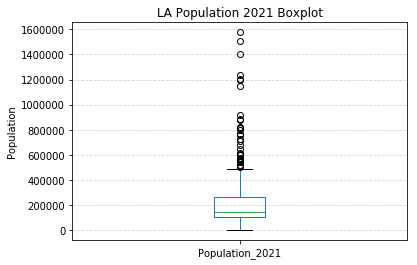

In [16]:
import matplotlib.pyplot as plt

# Create boxplot
df_pop_la['Population_2021'].plot(kind='box', title='LA Population 2021 Boxplot')

plt.ylabel('Population')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [17]:
print("{} have the largest population percentage change of {}%".format(
    ", ".join(df_pop_la.loc[df_pop_la['Population_2021'] == df_pop_la['Population_2021'].max(skipna=True), 'Area_name']), 
    df_pop_la['Population_2021'].max(skipna=True))
    )

Kent have the largest population percentage change of 1576069.0%


In [18]:
print("{} have the largest population percentage change of {}%".format(
    ", ".join(df_pop_la.loc[df_pop_la['Percentage_change'] == df_pop_la['Percentage_change'].max(skipna=True), 'Area_name']), 
    df_pop_la['Percentage_change'].max(skipna=True))
    )

Tower Hamlets have the largest population percentage change of 22.1%


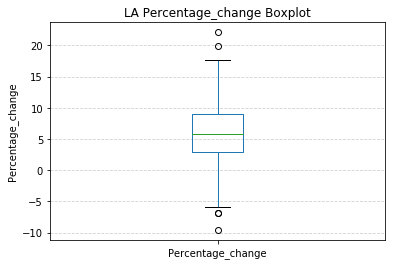

In [19]:
import matplotlib.pyplot as plt

# Create boxplot
df_pop_la['Percentage_change'].plot(kind='box', title='LA Percentage_change Boxplot')

plt.ylabel('Percentage_change')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()